In [11]:
import os
import pandas as pd
from networkx.algorithms.bipartite.basic import color


def get_dataset(dataset_path):
    if not os.path.exists(dataset_path):
        print("Dataset not found")
        return None
    dataset = []
    
    for folder in os.listdir(dataset_path):
        if not os.path.isdir(os.path.join(dataset_path, folder)):
            continue
        for file in os.listdir(dataset_path + '/' + folder):
            if not file.endswith('.png'):
                continue
            csv_file = dataset_path + '/' + folder + '/' + file[:-4] + '.csv'
            res_df = pd.read_csv(csv_file)
            image = os.path.join(dataset_path, folder, file)
            y = res_df['y'].to_numpy()
            dataset.append([image, y])
            
    return pd.DataFrame(dataset, columns=['image', 'y'])
                
dataset = get_dataset('synthetic_dataset')
dataset

image  \
0    synthetic_dataset/135/c01-014.png   
1    synthetic_dataset/135/c01-009.png   
2    synthetic_dataset/307/g02-073.png   
3    synthetic_dataset/551/n06-194.png   
4    synthetic_dataset/551/n06-156.png   
5    synthetic_dataset/551/n06-182.png   
6    synthetic_dataset/551/n06-169.png   
7    synthetic_dataset/551/n06-186.png   
8    synthetic_dataset/551/n06-163.png   
9    synthetic_dataset/551/n06-201.png   
10   synthetic_dataset/551/n06-175.png   
11   synthetic_dataset/551/n06-148.png   
12   synthetic_dataset/551/m06-019.png   
13  synthetic_dataset/338/g06-042g.png   
14  synthetic_dataset/338/g06-018g.png   
15  synthetic_dataset/338/g06-045g.png   
16  synthetic_dataset/338/g06-031g.png   
17  synthetic_dataset/338/g06-050g.png   
18  synthetic_dataset/338/g06-011g.png   
19  synthetic_dataset/338/g06-047g.png   
20  synthetic_dataset/338/g06-026g.png   
21  synthetic_dataset/338/g06-037g.png   
22   synthetic_dataset/556/n01-036.png   
23   synthetic_dataset/300/g01-067.png   
24   synthetic_dataset/300/g01-070.png   
25   synthetic_dataset/300/g01-074.png   
26   synthetic_dataset/132/b06-082.png   
27   synthetic_dataset/132/b06-045.png   

                                                    y  
0   [900, 1100, 1250, 1600, 1800, 1950, 2150, 2300...  
1   [900, 1050, 1300, 1450, 1600, 1800, 1850, 2000...  
2                        [750, 900, 1150, 1250, 1450]  
3      [700, 900, 1100, 1250, 1400, 1600, 1800, 1950]  
4                       [700, 1300, 1450, 1650, 2000]  
5           [750, 1100, 1300, 1450, 1600, 1800, 1950]  
6            [700, 900, 1100, 1300, 1450, 1600, 1800]  
7      [750, 850, 1050, 1300, 1400, 1650, 1800, 1950]  
8   [750, 850, 1050, 1250, 1450, 1650, 1800, 2200,...  
9      [700, 950, 1100, 1250, 1450, 1650, 1800, 1950]  
10  [700, 900, 1100, 1300, 1450, 1600, 1850, 1950,...  
11     [750, 900, 1100, 1300, 1450, 1650, 1800, 1950]  
12           [750, 900, 1100, 1250, 1500, 1600, 1800]  
13                            [800, 1000, 1150, 1350]  
14                 [700, 900, 1050, 1200, 1400, 1600]  
15                 [750, 900, 1100, 1250, 1450, 1600]  
16                 [700, 900, 1100, 1300, 1400, 1600]  
17                 [700, 850, 1050, 1200, 1400, 1600]  
18     [750, 950, 1100, 1250, 1450, 1650, 1750, 2000]  
19                            [900, 1000, 1400, 1600]  
20                                  [800, 1000, 1200]  
21     [700, 900, 1250, 1450, 1600, 1800, 2000, 2150]  
22                            [900, 1050, 1250, 1450]  
23  [800, 950, 1100, 1250, 1450, 1700, 1800, 2000,...  
24  [750, 950, 1100, 1300, 1450, 1650, 1850, 2000,...  
25  [850, 1000, 1200, 1400, 1550, 1750, 1950, 2150...  
26  [700, 850, 1100, 1250, 1400, 1550, 1950, 2150,...  
27           [700, 900, 1050, 1200, 1600, 1800, 1950]

In [18]:
from PIL import Image, ImageDraw

def get_bounding_boxes(image_path, y, height=150):
    image = Image.open(image_path)
    boxes = []
    for y_i in y:
        x1, x2 = 0, image.width
        y1, y2 = y_i, y_i + height
        boxes.append([x1, y1, x2, y2])
    return boxes

def draw_bounding_boxes(image, boxes):
    # convert to RGB
    image = image.convert('RGB')
    draw = ImageDraw.Draw(image)
    colors = ['red', 'blue']
    for index, box in enumerate(boxes):
        box = [box[0] + 10, box[1] + 10, box[2] - 10, box[3] - 10]
        draw.rectangle(box, outline=colors[index % 2], width=1)
    return image

boxes = get_bounding_boxes(dataset.iloc[0]['image'], dataset.iloc[0]['y'])
image = Image.open(dataset.iloc[0]['image'])
draw_bounding_boxes(image, boxes).show()

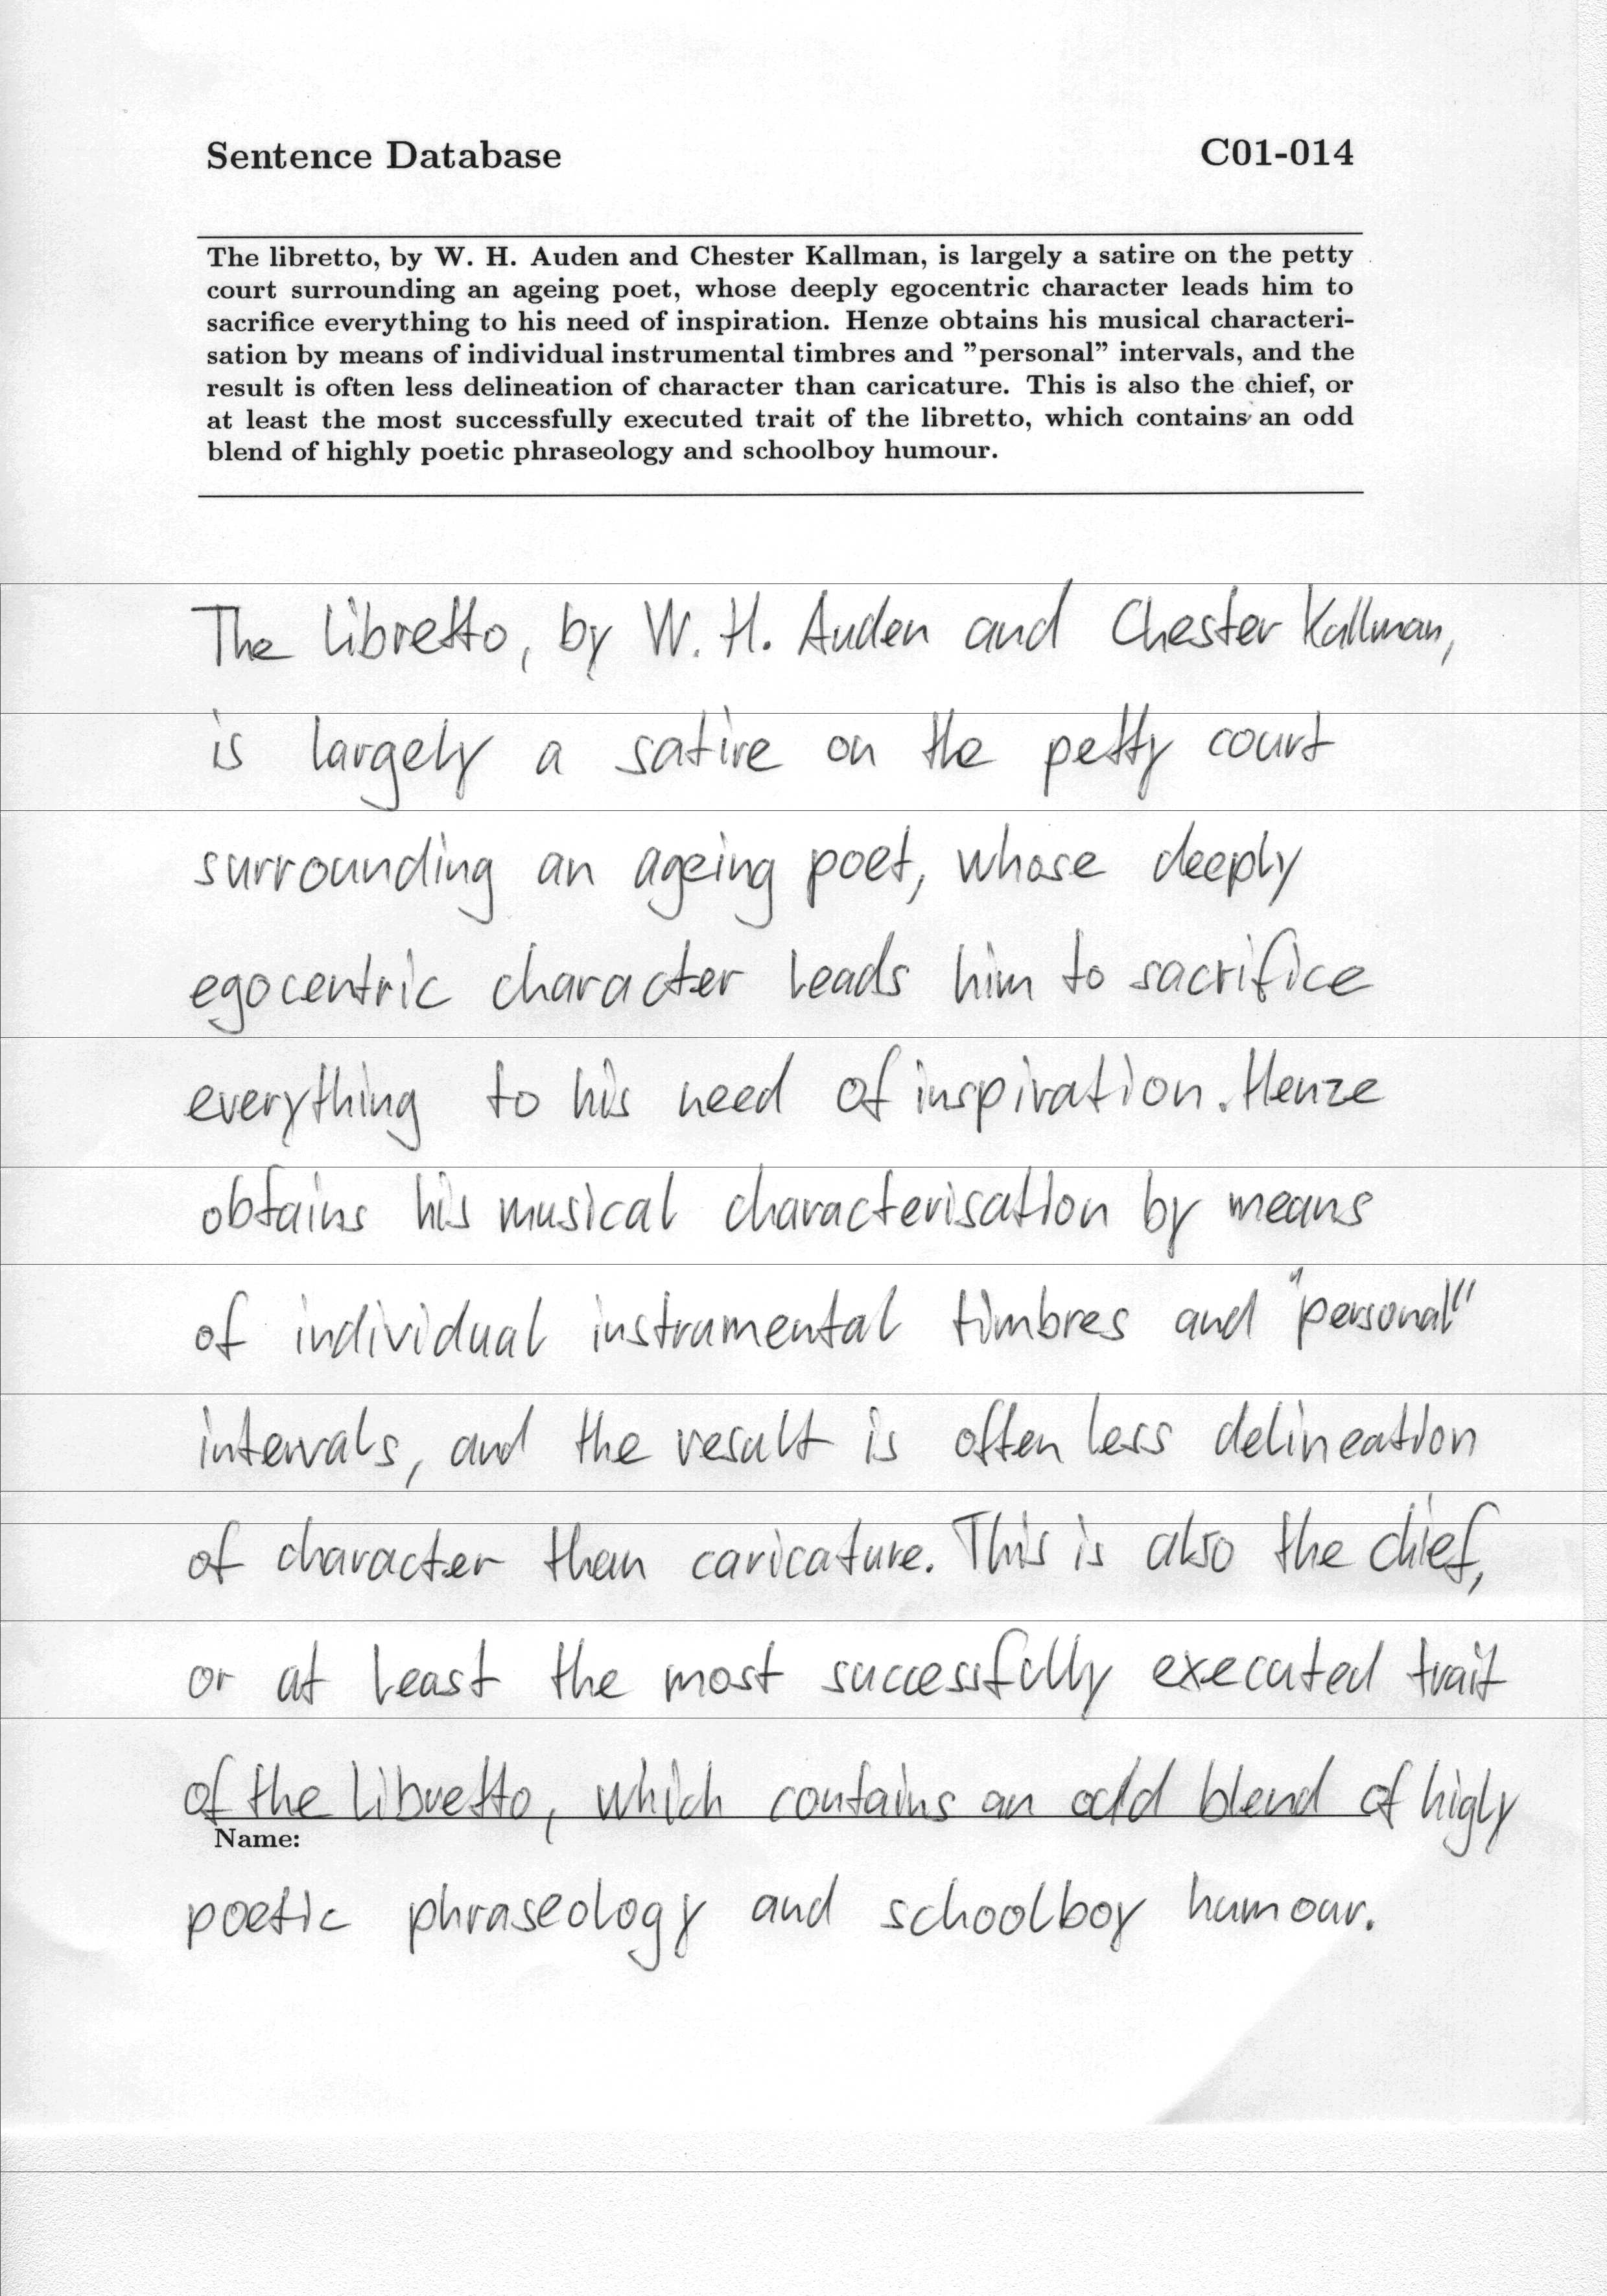

In [20]:
import numpy as np
import os
from PIL import Image, ImageDraw

x_i = dataset.iloc[0]

image = Image.open(x_i['image'])
annotations = get_bounding_boxes(x_i['image'], x_i['y'])
draw = ImageDraw.Draw(image)

categories = ["text"]

id2label = {index: x for index, x in enumerate(categories, start=0)}
label2id = {v: k for k, v in id2label.items()}

for box in annotations:
    class_idx = 0
    x, y, w, h = tuple(box)
    x1, y1 = int(x), int(y)
    x2, y2 = int(x + w), int(y + h)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    draw.text((x, y), id2label[class_idx], fill="white")

image

Use the following doc to build the rest of the training pipeline:
https://huggingface.co/docs/transformers/en/tasks/object_detection#training-the-detection-model